# 1. 神经网络结构设计与调优
在人工构造的MNIST数据集的子集上进行训练/测试，要求：

（1）参考课件中给出的代码，实现以下两种不同的网络结构（要求用numpy手动实现前向传播和反向传播等过程）：
- 2层前馈网络，以sigmoid或tanh作为激活函数（选择效果较好的一个即可），隐含层维度自定
- 3层前馈网络，以relu作为激活函数，隐含层维度自定

（2）两个网络在测试集上分类准确率均$\ge$90%

（3）画出训练过程中训练集上loss和训练集上accuracy的变化曲线

（4）参考课件中给出的代码，可视化神经网络在测试集上的预测结果，要求标出true positive(TP)以及TN/FP/FN，并计算accuracy

（5）公平起见，只能用给出的MNIST子集，不能自行取其他子集


本次作业涉及到的激活函数的定义及其导函数：
- $sigmoid(x)=1/(1+e^{-x})$, 导函数$sigmoid(x)(1-sigmoid(x))$
- $tanh(x)=(e^x-e^{-x})/(e^x+e^{-x})$，导函数$1-tanh^2(x)$
- $relu(x)=max(0,x)$，导函数$f(x)=\begin{cases}1, x>0 \\ 0, x\le0\end{cases}$

调优的角度，包括但不限于：
- batch size大小
- loss function（MSE，交叉熵……）
- 优化器的参数（学习率，学习率调整策略，优化器类型……）
- iteration数量

其他：
- 网络权重初始化策略
- 数据预处理

In [1]:
# 读取训练和测试数据
# 本次作业为加快训练速度，只取1000个样本作为训练集，200个样本作为测试集
# 每个样本原本是28*28的图片，reshape成784维向量输入神经网络
# 只取（形状比较相近的）数字8和数字9两个类，做二分类，并将数字8的label重新标为0，数字9的label重新标为1
# 两个类的训练样本数不均衡（1:3）
# 本部分代码不可修改

import numpy as np
f = np.load('mnist.npz') 
x_train, y_train = f['x_train'], f['y_train'] 
x_test, y_test = f['x_test'], f['y_test'] 

def get_small_data(x_data, y_data, num1, num2):
    cnt1, cnt2, final_x, final_y = 0, 0, [], []
    for i in range(x_data.shape[0]):
        x = x_data[i, :].reshape(-1).tolist()
        y = y_data[i]
        if y == 8 and cnt1 < num1:
            final_x.append(x)
            final_y.append(0)
            cnt1 += 1
        elif y == 9 and cnt2 < num2:
            final_x.append(x)
            final_y.append(1)
            cnt2 += 1
    return np.array(final_x), np.array(final_y)

x_train, y_train = get_small_data(x_train, y_train, num1=250, num2=750)
x_test, y_test = get_small_data(x_test, y_test, num1=100, num2=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1000, 784)
(1000,)
(200, 784)
(200,)


In [2]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [3]:
def sigmoid_grad(x):
    return 1.0/(1.0+np.exp(x)+np.exp(-x))

In [5]:
import matplotlib.pyplot as plt

In [6]:
def MSE(p,y):
    return np.square(p-y).sum()/2

In [8]:
x_train_1=x_train>200
x_test_1=x_test>200

In [361]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x_test_1)
x_test_2d=pca.transform(x_test_1)

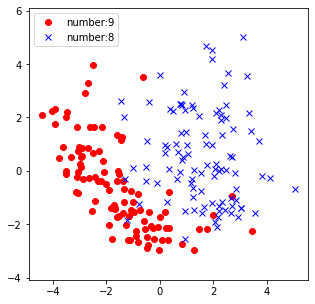

In [408]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x_test_2d[y_test==1,0],x_test_2d[y_test==1,1],'ro',label='number:9')
ax.plot(x_test_2d[y_test==0,0],x_test_2d[y_test==0,1],'bx',label='number:8')
ax.axis('equal')
ax.legend(loc='best')
plt.show()

# 双层

In [424]:
W_1=np.random.uniform(-1,1,size=(4,784))
W_2=np.random.uniform(-1,1,size=(1,4))
loss_list,acc_list=[],[]
alpha=0.001

In [425]:
for i in range(2000):
    z_1=W_1@(x_train_1.T)
    a_1=sigmoid(z_1)
    z_2=W_2@a_1
    a_2=sigmoid(z_2)
    loss=MSE(a_2,y_train)
    acc=np.sum((a_2>=.5)==y_train)/y_train.shape[0]
    loss_list.append(loss)
    acc_list.append(acc)
    delta_2=(a_2-y_train)*sigmoid_grad(z_2)
    W_2_grad=delta_2@(a_1.T)
    delta_1=(W_2.T@delta_2)*(sigmoid_grad(z_1))
    W_1_grad=delta_1@x_train_1
    W_1-=W_1_grad*alpha
    W_2-=W_2_grad*alpha
    if(i%200==0):
        print(i,loss,acc)

0 223.46689804159308 0.25
200 31.523184469442533 0.931
400 15.662249871658288 0.968
600 11.666095189870125 0.977
800 9.822640620508466 0.979
1000 8.192688261533371 0.98
1200 6.980998091216788 0.984
1400 6.180933039816242 0.986
1600 5.636687324432325 0.987
1800 5.272671842401251 0.988


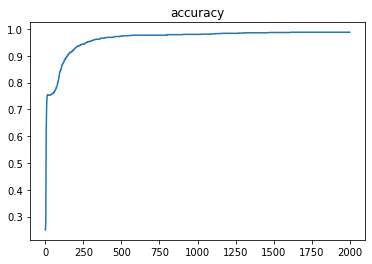

In [427]:
plt.plot(acc_list)
plt.title("accuracy")
plt.show()

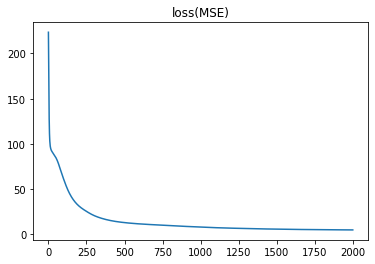

In [428]:
plt.plot(loss_list)
plt.title("loss(MSE)")
plt.show()

In [429]:
z_1=W_1@(x_test_1.T)
a_1=sigmoid(z_1)
z_2=W_2@a_1
a_2=sigmoid(z_2)
loss=MSE(a_2,y_test)
acc=np.sum((a_2>=.5)==y_test)/y_test.shape[0]
acc

0.9

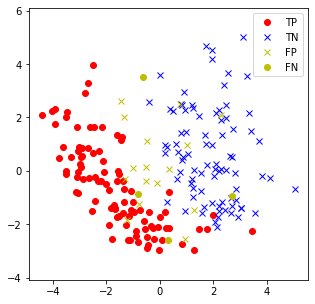

In [430]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x_test_2d[(y_test==1) & (predict>=.5).reshape(-1),0],x_test_2d[(y_test==1) & (predict>=.5).reshape(-1),1],'ro',label='TP')
ax.plot(x_test_2d[((y_test==0) & (predict<.5)).reshape(-1),0],x_test_2d[((y_test==0) & (predict<.5)).reshape(-1),1],'bx',label='TN')
ax.plot(x_test_2d[((y_test==0) & (predict>=.5)).reshape(-1),0],x_test_2d[((y_test==0) & (predict>=.5)).reshape(-1),1],'yx',label='FP')
ax.plot(x_test_2d[((y_test==1) & (predict<.5)).reshape(-1),0],x_test_2d[((y_test==1) & (predict<.5)).reshape(-1),1],'yo',label='FN')
ax.legend(loc='best')
ax.axis('equal')
plt.show()

# 三层(relu)

In [77]:
def relu(x):
    x[x<0]=0
    return x

def relu_grad(x):
    return 1.0*(x>0)

In [347]:
W_1=np.random.uniform(-1,1,size=(4,784))
W_2=np.random.uniform(-1,1,size=(3,4))
W_3=np.random.uniform(-1,1,size=(1,3))
alpha=0.001
loss_list,acc_list=[],[]

In [348]:
for i in range(4001):
    z_1=W_1@(x_train_1.T)
    a_1=relu(z_1)
    z_2=W_2@a_1
    a_2=relu(z_2)
    z_3=W_3@a_2
    a_3=relu(z_3)
    predict=np.arctan(a_3)/np.pi*2
    loss=MSE(predict,y_train)
    acc=np.sum((predict>=.5)==y_train)/y_train.shape[0]
    loss_list.append(loss)
    acc_list.append(acc)
    delta_3=(predict-y_train)*relu_grad(z_3)*2/(np.pi*(1+np.square(a_3)))
    W_3_grad=delta_3@(a_2.T)
    delta_2=(W_3.T@delta_3)*(relu_grad(z_2))
    W_2_grad=delta_2@(a_1.T)
    delta_1=(W_2.T@delta_2)*(relu_grad(z_1))
    W_1_grad=delta_1@x_train_1
    W_1-=W_1_grad*alpha
    W_2-=W_2_grad*alpha
    W_3-=W_3_grad*alpha
    if(i%200==0):
        print(i,loss,acc)
    if(i%500==0):
        z_1=W_1@(x_test_1.T)
        a_1=relu(z_1)
        z_2=W_2@a_1
        a_2=relu(z_2)
        z_3=W_3@a_2
        a_3=relu(z_3)
        predict=np.arctan(a_3)/np.pi*2
        acc=np.sum((predict>=.5)==y_test)/y_test.shape[0]
        print(acc)

0 281.13501366509473 0.329
0.55
200 34.698450169767476 0.925
400 25.839784277640966 0.944
0.875
600 19.521375365841813 0.956
800 17.7822036269177 0.959
1000 15.173062305497506 0.966
0.89
1200 13.935244487421276 0.97
1400 13.402568951582104 0.971
0.885
1600 12.7961254610154 0.973
1800 11.302493058584925 0.974
2000 9.362872972356508 0.978
0.89
2200 8.370004455314017 0.983
2400 7.230492509051087 0.985
0.89
2600 6.8475959641978825 0.986
2800 6.463777907769659 0.987
3000 5.989557209858169 0.987
0.885
3200 5.41223680522743 0.989
3400 5.074020755011949 0.99
0.895
3600 4.893835588074293 0.99
3800 3.564375328411145 0.993
4000 3.3690389032146357 0.994
0.9


In [416]:
z_1=W_1@(x_test_1.T)
a_1=relu(z_1)
z_2=W_2@a_1
a_2=relu(z_2)
z_3=W_3@a_2
a_3=relu(z_3)
predict=np.arctan(a_3)/np.pi*2
acc=np.sum((predict>=.5)==y_test)/y_test.shape[0]
print(acc)

0.9


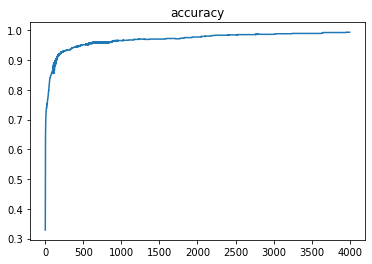

In [356]:
plt.plot(acc_list)
plt.title("accuracy")
plt.show()

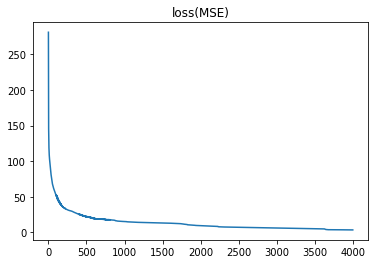

In [355]:
plt.plot(loss_list)
plt.title("loss(MSE)")
plt.show()

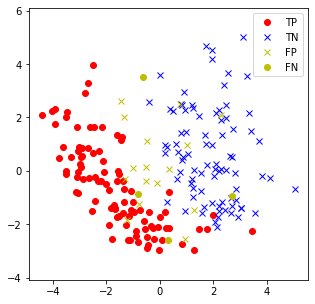

In [415]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x_test_2d[(y_test==1) & (predict>=.5).reshape(-1),0],x_test_2d[(y_test==1) & (predict>=.5).reshape(-1),1],'ro',label='TP')
ax.plot(x_test_2d[((y_test==0) & (predict<.5)).reshape(-1),0],x_test_2d[((y_test==0) & (predict<.5)).reshape(-1),1],'bx',label='TN')
ax.plot(x_test_2d[((y_test==0) & (predict>=.5)).reshape(-1),0],x_test_2d[((y_test==0) & (predict>=.5)).reshape(-1),1],'yx',label='FP')
ax.plot(x_test_2d[((y_test==1) & (predict<.5)).reshape(-1),0],x_test_2d[((y_test==1) & (predict<.5)).reshape(-1),1],'yo',label='FN')
ax.legend(loc='best')
ax.axis('equal')
plt.show()

# 2. PyTorch基础练习
请注意，本题要求全部基于pytorch实现，不能使用pytorch的.tolist()或者.numpy()等函数将tensor转换成list或者numpy array来处理

（1）首先，创建一个服从标准正态分布的$3\times 4$的tensor $A$，和一个服从标准正态分布的$2\times6$的tensor $B$

In [1]:
import torch
A=torch.randn((3,4),requires_grad=True)
B=torch.randn((2,6))

In [2]:
A

tensor([[-0.6162, -0.6068, -0.3887,  0.3925],
        [ 0.8166,  0.1202, -0.2362,  0.7543],
        [ 0.9240, -0.0084,  0.4462,  1.1404]], requires_grad=True)

In [3]:
B

tensor([[ 0.0836,  0.0057,  0.0894, -0.2286,  0.9609,  0.1863],
        [-0.6153, -1.1961, -0.8059, -0.4842,  1.4108,  1.2513]])

（2）使用view操作将$B$的形状也转换成$3\times 4$，计算$A+B$和$AB^\top$（矩阵乘法）

In [4]:
B=B.reshape(3,4)

In [5]:
A+B

tensor([[-0.5325, -0.6011, -0.2993,  0.1639],
        [ 1.7774,  0.3065, -0.8516, -0.4418],
        [ 0.1181, -0.4926,  1.8571,  2.3917]], grad_fn=<AddBackward0>)

In [6]:
A@B.T

tensor([[-0.1795, -0.9354,  0.7331],
        [-0.1246,  0.0501, -0.1057],
        [-0.1436, -0.7523,  1.3160]], grad_fn=<MmBackward>)

（3）取出矩阵$A$的所有大于0的值，并按照行的顺序排列成一个一维的tensor $C$。
例如：\[\[0, 0.1, 0.2], \[-0.3, 0.4, -0.5]]需要转换成\[0.1, 0.2, 0.4]

In [7]:
C=A[A>0]

In [8]:
C

tensor([0.3925, 0.8166, 0.1202, 0.7543, 0.9240, 0.4462, 1.1404],
       grad_fn=<IndexBackward>)

（4）将$C$的每个元素平方，得到$D$。计算$D$的平均值$mean(D)$，并求出$mean(D)$对$A$的梯度

In [9]:
D=C.square()

In [10]:
out=D.mean()

In [11]:
out.backward()

In [12]:
A.grad

tensor([[0.0000, 0.0000, 0.0000, 0.1121],
        [0.2333, 0.0343, 0.0000, 0.2155],
        [0.2640, 0.0000, 0.1275, 0.3258]])